<a id = 'title'></a>

# Контекст
Заказчик запланировал открыть небольшое кафе в Москве. Отличительная особенность - обслуживание роботами. 
Средства на открытие будут привлекаться от инвесторов. Инвесторов интересует текущее положение дел на рынке и насколько перспективно в долгосрочном периоде кафе с роботами-официантами. Наша главная задача - подготовить исследование рынка с использованием информации из открытых источников. Мы имеем два набора данных, один из которых содержит информацию об объектах общепита, а второй - об улицах и районах города.

# Задачи исследования

# [Шаг №1. Загрузите данные и подготовьте их к анализу](#stage_1)
Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.

Файл: rest_data.csv

---

# [Шаг №2. Анализ данных](#stage_2)
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

1. [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график](#stage_2_1)

2. [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график](#stage_2_2)

3. [Для какого вида объекта общественного питания характерно сетевое распространение?](#stage_2_3)

4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#stage_2_4)

5. [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики](#stage_2_5)

6. [Выделите в отдельный столбец информацию об улице из столбца address](#stage_2_6)

7. [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#stage_2_7)

8. [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#stage_2_8)

9. [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#stage_2_9)

---

# [Шаг №3. Подготовка презентации](#stage_3)
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:
Презентация: <ссылка на облачное хранилище с презентацией>


# Описание данных
## Файл rest_data.csv:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

<a id = 'stage_1'></a>

# Шаг №1. Загрузите данные и подготовьте их к анализу

[к оглавлению](#title)

In [2]:
data = pd.read_csv('rest_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [4]:
data[data['object_type'] == 'предприятие быстрого обслуживания'].head()    # заменим на фастфуд (название слишком длинное)

,id,object_name,chain,object_type,address,number
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
17,154654,Донер Кебаб,нет,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 4",2
95,127674,СУШИ SHOP,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Бирюзова, дом 13",12
120,26075,МАКДОНАЛДС,да,предприятие быстрого обслуживания,"город Москва, Большая Бронная улица, дом 29",580
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0


In [5]:
def zamena(x):
    if x == 'предприятие быстрого обслуживания':
        return 'фастфуд'
    else:
        return x

data['object_type'] = data['object_type'].map(zamena)
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фастфуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'магазин (отдел кулинарии)'],
      dtype=object)

In [6]:
def zamena1(x):
    if x == 'да':
        return 'сетевое'
    else:
        return 'несетевое'

data['chain'] = data['chain'].map(zamena1)
data['chain'].unique()

array(['несетевое', 'сетевое'], dtype=object)

In [7]:
# посмотрим сколько разных Шоколадниц у нас в списке
spisok =[]
for i in data['object_name']:
    if 'Шоколадница' in i:
        spisok.append(i)

pd.Series(spisok).unique()

array(['Шоколадница', 'Шоколадница Кофе Хаус', 'Кофейня «Шоколадница»',
       'Кафе «Шоколадница»', 'КАФЕ «Шоколадница»', 'кафе «Шоколадница»',
       'Кофейня Шоколадница', 'Шоколадница Экспресс',
       'Шоколадница Кофемания'], dtype=object)

In [8]:
# Выявим интересную пунктуацию внутри каждого названия (прекрасно понимаю, что есть модуль, кот. за это отвечает - просто пробую)
spisok_ne_bukv =[]
alphabet_rus = 'абвгдеёжзийклмнопрстуфхцчшщъьыэюя'
alphabet_eng = 'abcdefghijklmnopqrstuvwxyz'
zifri = '1234567890'
for i in data['object_name']:
    i = list(i)
    for j in i:
        if j not in alphabet_rus and j not in alphabet_rus.upper() and j not in zifri and j not in alphabet_eng and j not in alphabet_eng.upper():
            spisok_ne_bukv.append(j)

pd.Series(spisok_ne_bukv).unique()

array([' ', '«', '»', '.', '№', '-', '(', ')', "'", '&', ',', '+'],
      dtype=object)

In [9]:
# + - & №  это отличительные черты названий заведений, поэтому их не трогаем, остальное надо удалить и все в нижний регистр и без пробелов

spisok_problem = [' ', '«', '»', '.', '(', ')', "'", ',']

def normolize_name(x):
    x = x.lower()
    for i in x:
        if i in spisok_problem:
            x =  x.replace(i, '')
    return x

data['object_name'] = data['object_name'].map(normolize_name)
data['object_name'].unique()

array(['сметана', 'родник', 'кафеакадемия', ..., 'лаундж-бармятаlounge',
       'бармятаlounge', 'мятаloungeоктябрьская'], dtype=object)

In [10]:
data.duplicated().sum() # Сколько дубликатов

0

---

<a id = 'stage_2'></a>

# Шаг №2. Анализ данных

[к оглавлению](#title)

---

<a id = 'stage_2_1'></a>

### 1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график

[к оглавлению](#title)

,тип заведения,количество заведений
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,фастфуд,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


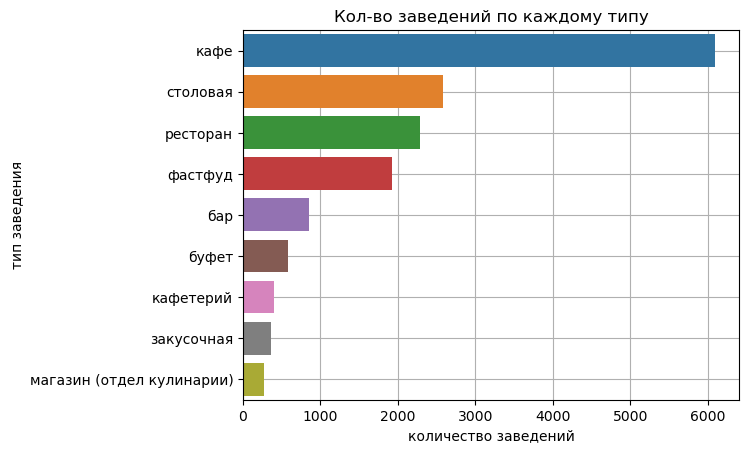

In [11]:
# Выборка
data_1 = data['object_type']
data_1 =\
data_1.value_counts() \
      .to_frame() \
      .reset_index() \
      .rename({'object_type': 'количество заведений', 'index': 'тип заведения'}, axis = 1)

# построение
plt.figure()
ax =\
sns.barplot(data = data_1,
            x = 'количество заведений',
            y = 'тип заведения')
plt.grid()
ax.set_axisbelow(b = True)
plt.title('Кол-во заведений по каждому типу')

data_1

- Кафе - самый распространенный тип
- Кулинарий в магазинах, закусочных, кафетерий - мало --> до 400
- Столовых, ресторанов и фастфудов меньше чем кафе (1900 - 2600 шт.)

---

<a id = 'stage_2_2'></a>

### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график

[к оглавлению](#title)

,сеть/не сеть,тип заведения,кол-во заведений
0,несетевое,бар,819
1,несетевое,буфет,574
2,несетевое,закусочная,304
3,несетевое,кафе,4703
4,несетевое,кафетерий,346
5,несетевое,магазин (отдел кулинарии),195
6,несетевое,ресторан,1741
7,несетевое,столовая,2584
8,несетевое,фастфуд,1132
9,сетевое,бар,37


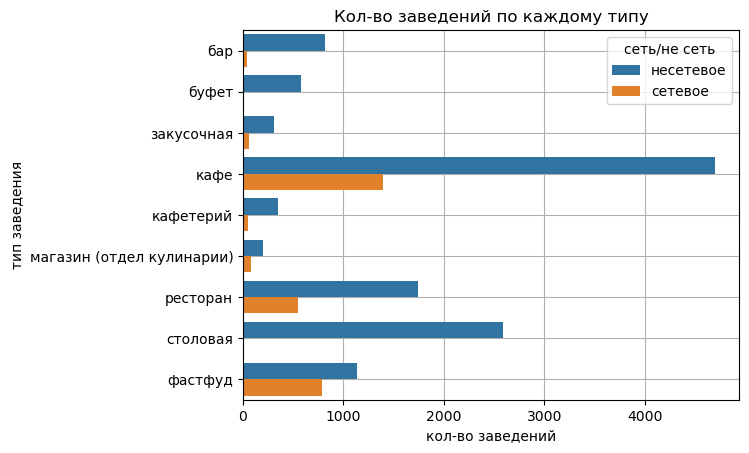

In [12]:
# Подготовка датасета под график
data2 = \
data.groupby(['chain', 'object_type']) \
    .agg({'chain': 'count'}) \
    .rename({'chain': 'кол-во заведений'}, axis=1) \
    .reset_index() \
    .rename({'chain': 'сеть/не сеть', 'object_type': 'тип заведения'}, axis = 1)

# построение
plt.figure()
ax =\
sns.barplot(data = data2,
            x = 'кол-во заведений',
            y = 'тип заведения',
            hue = 'сеть/не сеть')
plt.grid()
ax.set_axisbelow(b = True)
plt.title('Кол-во заведений по каждому типу')

data2

Text(0.5, 1.0, 'Кол-во заведений по сетевому (несетевому) виду')

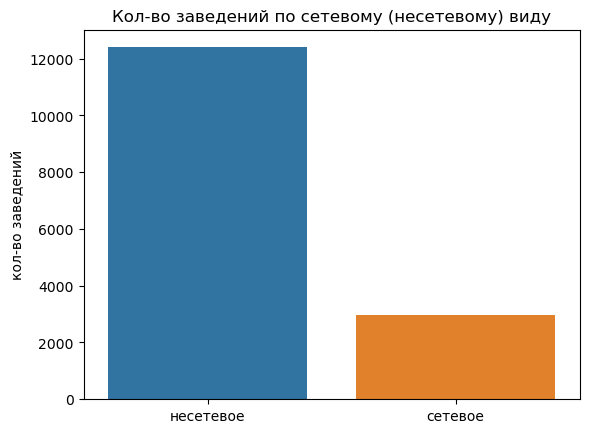

In [13]:
data2_dop = data.groupby('chain').agg({'chain': 'count'}).rename({'chain': 'кол-во заведений'}, axis=1).reset_index()
sns.barplot(data = data2_dop,
            x = 'chain',
            y = 'кол-во заведений')
plt.xlabel('')
plt.title('Кол-во заведений по сетевому (несетевому) виду')

- среди сетевых и не сетвых заведений самое популярное - кафе
- кол-во сетевых буфетов, столовых, баров, закусочных, кафетерий, кулинарий очень мало
- кол-во несетевых заведений гораздо больше

---

<a id = 'stage_2_3'></a>

### 3. Для какого вида объекта общественного питания характерно сетевое распространение?

[к оглавлению](#title)

In [14]:
# подготовка датасета к построению

# подсчет кол-ва заведений по каждому типу (кафе, столовая и тд.) и по виду (сеть/не сеть)
data3 = \
data.groupby(['chain', 'object_type'])['chain'].count().to_frame().rename({'chain': 'count'}, axis=1).reset_index()

# Подсчет всех заведений по типу (кафе, столовая и тд.) для дальнейшего merge с предыдущим датасетом
data3_dop =\
data.groupby('object_type')['object_type'].count().to_frame().rename({'object_type': 'all_count'}, axis=1).reset_index()

# merge
data3 =\
pd.merge(data3,
         data3_dop,
         on = 'object_type')

# посчет доли
data3 = data3.eval('dolya = (count / all_count) * 100').round()
data3['dolya'] = data3['dolya'].astype(int)
data3

,chain,object_type,count,all_count,dolya
0,несетевое,бар,819,856,96
1,сетевое,бар,37,856,4
2,несетевое,буфет,574,585,98
3,сетевое,буфет,11,585,2
4,несетевое,закусочная,304,360,84
5,сетевое,закусочная,56,360,16
6,несетевое,кафе,4703,6099,77
7,сетевое,кафе,1396,6099,23
8,несетевое,кафетерий,346,398,87
9,сетевое,кафетерий,52,398,13


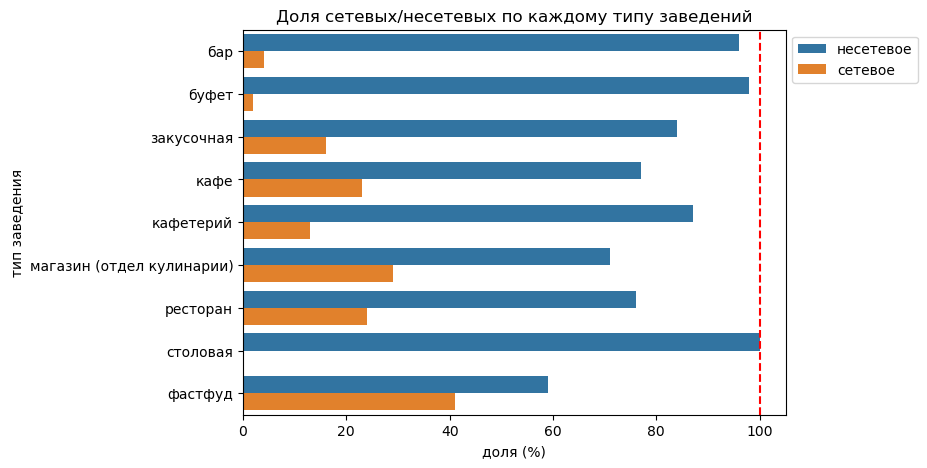

In [15]:
# построение
plt.figure(figsize=(7, 5))

sns.barplot(data = data3,
            x = 'dolya',
            y = 'object_type',
            hue = 'chain')

plt.legend(bbox_to_anchor = (1, 1))
plt.xlabel('доля (%)')
plt.ylabel('тип заведения')
plt.title('Доля сетевых/несетевых по каждому типу заведений')
plt.axvline(x = 100,
            color = 'red',
            linestyle = '--')

- больше всего заведений сетевого типа - кафе (фастфуфов и ресторанов тоже много)
- сетевых столовых практически нет
- доля сетевых заведений по всем видам предприятий меньше чем у несетевых
- фастфуд - единственный тип заведения, который хоть как-то борется за сеть (40% против 60% )

---

<a id = 'stage_2_4'></a>

### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

[к оглавлению](#title)

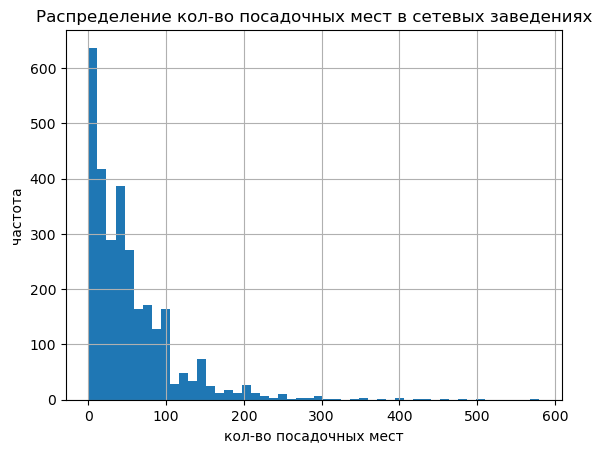

In [16]:
data4 = data[data['chain'] == 'сетевое']

data4['number'].plot(kind = 'hist',
           bins = 50)
plt.title('Распределение кол-во посадочных мест в сетевых заведениях')
plt.ylabel('частота')
plt.xlabel('кол-во посадочных мест')
plt.grid()

Text(0.5, 0, 'кол-во посадочных мест')

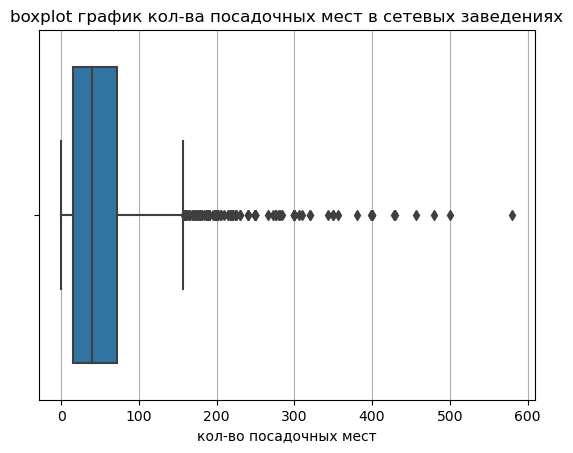

In [17]:
sns.boxplot(data = data4,
            x = 'number')
plt.grid(axis = 'x')
plt.title('boxplot график кол-ва посадочных мест в сетевых заведениях')
plt.xlabel('кол-во посадочных мест')

Для сетевых заведений характерны:

- мало посадочных мест
- много заведений

---

<a id = 'stage_2_5'></a>

### 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики

[к оглавлению](#title)

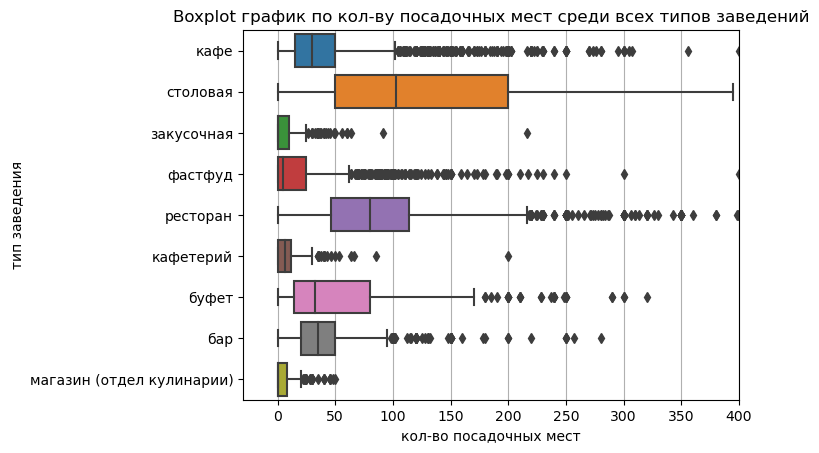

In [18]:
# Построим boxplot график посадочных мест для каждого типа заведения 
ax =\
sns.boxplot(data = data,
            x = 'number',
            y = 'object_type')
plt.xlim((-30,400))
plt.title('Boxplot график по кол-ву посадочных мест среди всех типов заведений')
plt.xlabel('кол-во посадочных мест')
plt.ylabel('тип заведения')
plt.grid(axis = 'x')
ax.set_axisbelow(b = True)

,object_type,50%
0,столовая,103.0
1,ресторан,80.0
2,бар,35.0
3,буфет,32.0
4,кафе,30.0
5,кафетерий,6.0
6,фастфуд,5.0
7,закусочная,0.0
8,магазин (отдел кулинарии),0.0


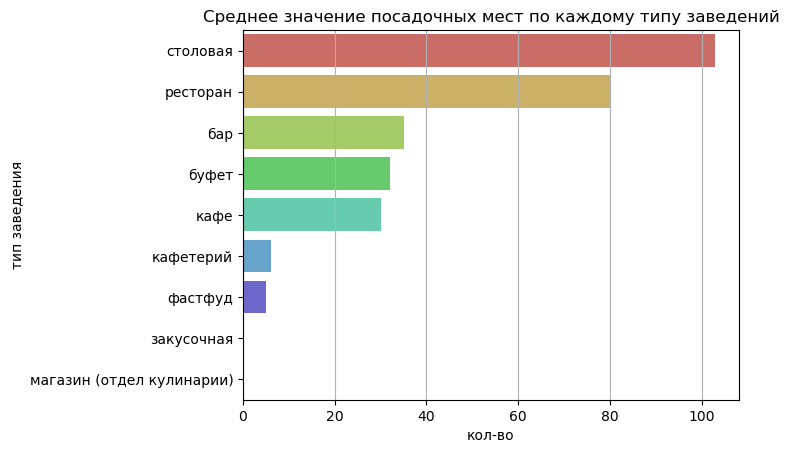

In [19]:
data5 =\
data.groupby('object_type')['number'].describe().round(1)['50%'].sort_values(ascending=False).reset_index()
sns.barplot(data = data5,
            x = '50%',
            y = 'object_type',
            palette='hls')
plt.title('Среднее значение посадочных мест по каждому типу заведений')
plt.xlabel('кол-во')
plt.ylabel('тип заведения')
plt.grid(axis = 'x')
data5

В столовых и ресторанах больше всего посадочных мест

---

<a id = 'stage_2_6'></a>

### 6. Выделите в отдельный столбец информацию об улице из столбца address

[к оглавлению](#title)

In [20]:
def street(x):
    index_0 = x.find('город Москва')
    index_1 = x.find('дом')

    # исправляем косяки - ниже описаны, почему они появились
    if 'Талдомская улица' in x:
        return 'Талдомская улица'
    # если вдруг нет фразы "город Москва"
    if index_0 == -1:
        return x[:index_1-2]
    else:
        return x[index_0+13:index_1-2]

data['street'] = data['address'].map(street)
data['street']

0                                    улица Егора Абакумова
1                                         улица Талалихина
2                                     Абельмановская улица
3                                       Абрамцевская улица
4                                       Абрамцевская улица
                               ...                        
15361                               3-й Крутицкий переулок
15362                                   улица Земляной Вал
15363                                   улица Земляной Вал
15364     поселение Московский, Киевское шоссе, 22-й ки...
15365                                    Ходынский бульвар
Name: street, Length: 15366, dtype: object

In [21]:
# вот было проблемное место: в некоторых названия улиц есть слово дом (Домодедовская) , поэтому не переводим в нижний регистр, 
# также есть проблема: улица Талдомская (тоже "дом" в нижнем регистре)

In [22]:
# еще есть строки с записью 'владение', их тоже учтем:
def street_vladenie(x):
    if 'владение' in x:
        index_1 = x.find('владение')
        x = x[:index_1-2]
        return x
    else:
        return x

data['street'] = data['street'].map(street_vladenie)
data.head()


,id,object_name,chain,object_type,address,number,street
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафеакадемия,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафевишневаяметель,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [23]:
data['len_street'] = data['street'].map(lambda x: len(x))
pd.DataFrame(data.query('len_street >= 40')['street'].unique())

,0
0,1-я линия Хорошёвского Серебряного Бора
1,"улица Мичуринский Проспект, Олимпийская Деревня"
2,"поселение Внуковское, улица Лётчика Ульянина"
3,"поселение Новофедоровское, деревня Рассудово,..."
4,"поселение Марушкинское, деревня Власово, Юбил..."
...,...
147,"поселение Десеновское, улица Дмитрия Рябинкина"
148,"поселение Воскресенское, деревня Ямонтово"
149,"поселение ""Мосрентген"", деревня Дудкино, владени"
150,"поселение Щаповское, улица Евгения Родионова,..."


Оставляем подробные адреса ( Например: поселение Московский, Киевское шоссе, 22-й километр и т.д.)
Если надо исключительно улицу (без уточненных данных поселока, и т.д.) то можно просто использовать список все видов улиц Москвы 
(на сайте: http://mosopen.ru/streets/type/17) и сделать find() по словам: шоссе, проспект, мост, набережная, аллея и тд. (параллельно индексируя)

Но нам в итоге нужны более подробные сведения, чтобы решить следующие пункты ---> оставляем поселок, 22-й км и тд.

In [24]:
data.head()

,id,object_name,chain,object_type,address,number,street,len_street
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,22
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,17
2,24309,кафеакадемия,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,21
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,19
4,119365,кафевишневаяметель,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,19


---

<a id = 'stage_2_7'></a>

### 7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

[к оглавлению](#title)

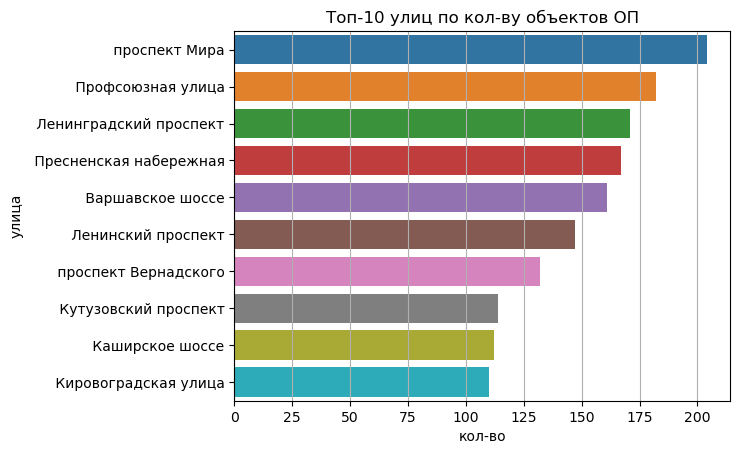

In [25]:
data7 =\
data.groupby('street').agg({'street': 'count'}).rename({'street':'object_count'}, axis=1) \
                                               .sort_values(by = 'object_count',
                                                            ascending=False) \
                                               .head(10)

# построим
sns.barplot(data = data7,
            x = 'object_count',
            y = data7.index)
plt.title('Топ-10 улиц по кол-ву объектов ОП')
plt.xlabel('кол-во')
plt.ylabel('улица')
plt.grid(axis = 'x')

In [26]:
# Интернет
areas = {'проспект Мира': [ 'Алексеевский', 'Марьина роща', 'Мещанский', 'Останкинский', 'Ростокино', 'Свиблово', 'Ярославский'],
         'Профсоюзная улица': ['Академический', 'Коньково', 'Обручевский', 'Тёплый Стан', 'Черёмушки', 'Ясенево'],
         'Ленинградский проспект': ['Беговой', 'Аэропорт', 'Сокол', 'Хорошёвский'],
         'Пресненская набережная': ['Пресненский'],
         'Варшавское шоссе': ['Донской', 'Нагатино-Садовники', 'Нагорный'],
         'Ленинский проспект': ['Гагаринский','Донской'],
         'Проспект Вернадского': ['Проспект Вернадского'],
         'Кутузовский проспект': ['Дорогомилово', 'Фили-Давыдково'],
         'Каширское шоссе': ['Нагатино-Садовники','Нагорный'],
         'Ходынский бульвар': ['Хорошёвский']}

---

<a id = 'stage_2_8'></a>

### 8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

[к оглавлению](#title)

In [27]:
data8 = \
data.groupby('street').agg({'id': 'count'}).rename({'id': 'count_object'}, axis=1).reset_index().sort_values(by = 'count_object')
data8 = data8.query('count_object == 1')
print(f'Число улиц с одним объектом ОП: {len(data8)}')

Число улиц с одним объектом ОП: 688


In [49]:
data8['street']

2111                       улица Сергея Макеева
660                      Кремлёвская набережная
661                     Кривоарбатский переулок
1532                                  Роговское
1531                                  Роговское
                         ...                   
69      1-я линия Хорошёвского Серебряного Бора
2                       1-й Балтийский переулок
86                        2-й Боткинский проезд
351              Большой Афанасьевский переулок
356                   Большой Казённый переулок
Name: street, Length: 688, dtype: object

In [29]:
data8['len_street'] = data8['street'].map(lambda x: len(x))
data8.query('len_street >= 40')

,street,count_object,len_street
1532,"поселение Роговское, посёлок Рогово, Школьная...",1,52
1530,"поселение Роговское, деревня Каменка, Централ...",1,56
1528,"поселение Роговское, деревня Бунчиха, владени",1,46
1527,"поселение Первомайское, посёлок Первомайское,...",1,60
1526,"поселение Первомайское, деревня Фоминское, Ле...",1,56
...,...,...,...
2101,"поселение Михайлово-Ярцевское, деревня Сенькин...",1,56
2100,"поселение Марушкинское, деревня Давыдково",1,41
1834,улица Линии Октябрьской Железной Дороги,1,40
74,104-й километр Московской Кольцевой Автодороги,1,47


In [40]:
# Заменим длинные названия (поселения и дальнейшего адреса) на просто название поселения
def stroka_to_name_poselenie(x):
    if 'поселение' in x:
        index_0 = x.find('поселение ')
        index_1 = x.find(',')
        return x[index_0+10:index_1]
    else:
        return x

data8['street'] = data8['street'].map(stroka_to_name_poselenie)
data8.head()

,street,count_object,len_street
2111,улица Сергея Макеева,1,20
660,Кремлёвская набережная,1,23
661,Кривоарбатский переулок,1,24
1532,Роговское,1,52
1531,Роговское,1,36


In [42]:
# Посмотрим сколько улиц с МКАДа
MKAD = []
for i in data8['street']:
    if 'километр' in i:
        MKAD.append(i)

len(MKAD)

21

In [ ]:
# я не смог найти в интернете название районов этих уоиц с МКАДа, поэтому в дальнейшем merge, они удаляться

In [30]:
# В этой ячейке результат парсинга с сайта мерии Москвы данных о всех улицах и районах Москвы и её поселениях (весь этот процесс в отдельном файле - парсинг_районов_улиц)

areas_streets = pd.read_csv('parsing_areas_streets.txt')
areas_streets = areas_streets[['Название улицы/поселения','Район']]
areas_streets

,Название улицы/поселения,Район
0,60-летия Октября проспект,Академический
1,Большая Черёмушкинская улица,Академический
2,Вавилова улица,Академический
3,Винокурова улица,Академический
4,Гримау улица,Академический
...,...,...
4225,Сосенское,Ленинский
4226,Троицк,NaN
4227,Филимонковское,Ленинский
4228,Щаповское,Подольский


In [44]:
def strips(x):
    return x.strip()

data8['street'] = data8['street'].map(strips)
data8.head()

,street,count_object,len_street
2111,улица Сергея Макеева,1,20
660,Кремлёвская набережная,1,23
661,Кривоарбатский переулок,1,24
1532,Роговское,1,52
1531,Роговское,1,36


In [50]:
data8 = \
data8[['street']].merge(areas_streets,
            left_on = 'street',
            right_on = 'Название улицы/поселения').drop('street', axis=1)
data8

,Название улицы/поселения,Район
0,Кремлёвская набережная,Хамовники
1,Кривоарбатский переулок,Арбат
2,Роговское,Подольский
3,Роговское,Подольский
4,Роговское,Подольский
...,...,...
510,Большой Знаменский переулок,Хамовники
511,Большой Кисельный переулок,Мещанский
512,Большой Афанасьевский переулок,Арбат
513,Большой Афанасьевский переулок,Хамовники


---

<a id = 'stage_2_9'></a>

### 9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

[к оглавлению](#title)

топ-10 улиц по кол-ву объектов питания уже был в 7 вопросе, воспользуемся им 

In [59]:
data7

,object_count
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


Text(0.5, 1.0, 'Распределение посадочных мест в топ-10 улиц (по кол-ву объектов ОП)')

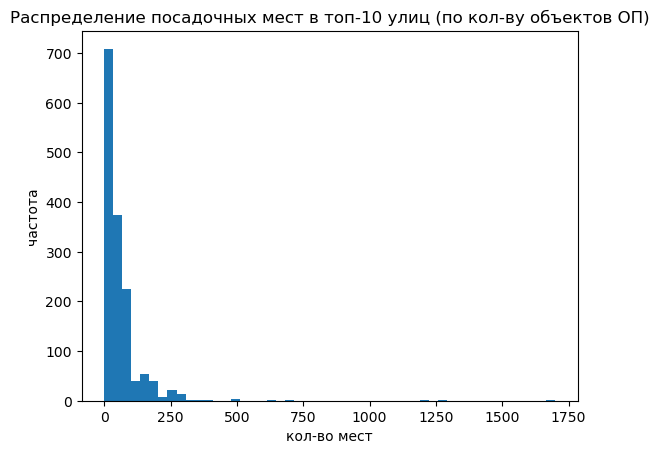

In [68]:
# возьмем индексы топ-10 улиц по кол-ву объектов
data_top_10_count_objects_index = data7.index

data9 = data.set_index('street').loc[data_top_10_count_objects_index]
data9['number'].plot(kind = 'hist',
                                                                             bins = 50)
plt.xlabel('кол-во мест')
plt.ylabel('частота')
plt.title('Распределение посадочных мест в топ-10 улиц (по кол-ву объектов ОП)')

Text(0.5, 1.0, 'boxplot график посадочных мест в топ-10 улиц (по кол-ву объектов ОП)')

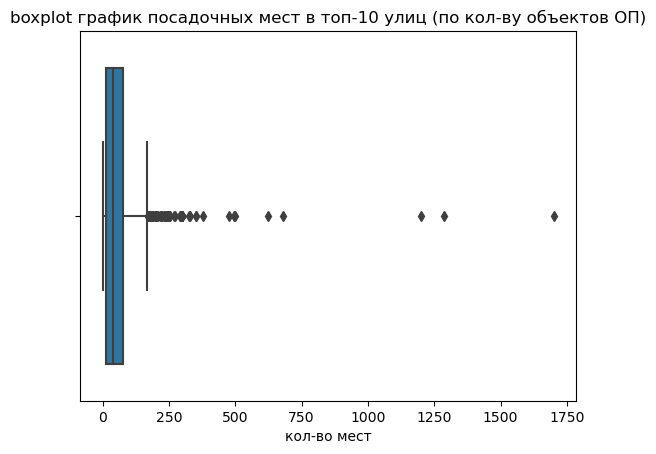

In [71]:
sns.boxplot(data = data9.reset_index(),
            x = 'number')
plt.xlabel('кол-во мест')
plt.ylabel('')
plt.title('boxplot график посадочных мест в топ-10 улиц (по кол-ву объектов ОП)')

(-10.0, 400.0)

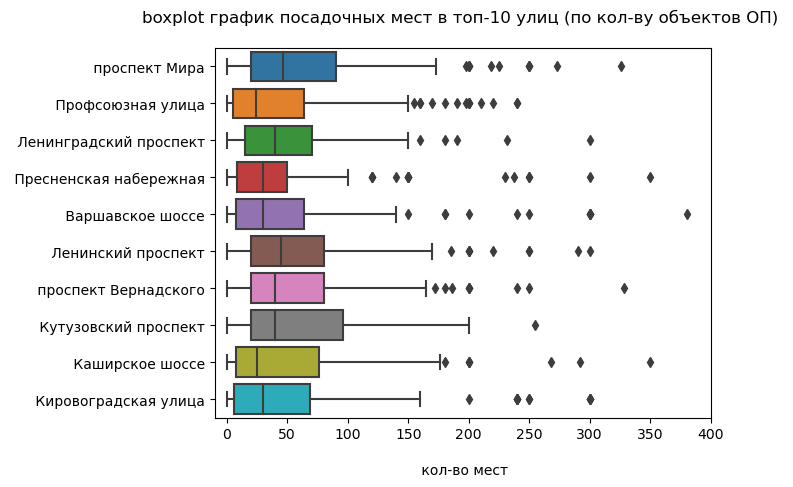

In [77]:
sns.boxplot(data = data9.reset_index(),
            x = 'number',
            y = 'street')
plt.xlabel('\n кол-во мест')
plt.ylabel('')
plt.title('boxplot график посадочных мест в топ-10 улиц (по кол-ву объектов ОП) \n')
plt.xlim((-10 , 400))

- Медиана схожа: 20 - 35 посадочных мест ( в общем: мало посадочных мест )
Причина: дороговизна земли в Москве

# Вывод:

- Заказчик планирует открыть кафе (с официантами роботами )
- Кафе - самое распространенный общепит в Москве
- БОльшее кол-во кафе имеет не сетевой вид
- сетевые заведения имееют малое кол-во посадочных мест
- на главных улицах столицы - посадочные места тоже в маленьких кол-вах
